In [1]:
import torch
from torch.utils.data import DataLoader
from torch import nn
import torch.optim as optim

import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'functions')))
from dataset import ChestXrayDataset
from train import train
from evaluation import plot_results ,eval_on_metrics
import timm

c:\Users\Furkan-PC\192.168.0.14+8000\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
IMAGE_PATH = "../archive/"
import glob

# Tüm alt klasörlerdeki jpg ve png dosyalarını alalım
image_paths = glob.glob(IMAGE_PATH + "**/images/*.[jp][pn]g", recursive=True)

print(f"Toplam {len(image_paths)} resim bulundu.")

Toplam 112120 resim bulundu.


In [3]:
TRAIN_PATH = '../data/AP_PA_Train.xlsx'
TEST_PATH = '../data/AP_PA_Test.xlsx'
VAL_PATH = '../data/AP_PA_Validation.xlsx'
LOG_PATH = 'logs/densenetfullyfinetune.log'
SAVE_PATH = 'models/densenetfullyfinetunebestmodel.pth'

In [4]:
num_classes = 2
EPOCHS = 30

In [5]:
model = timm.create_model('densenet121', pretrained=True).to('cuda')

model.reset_classifier(num_classes)

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
print(device)

cuda


In [7]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])


In [8]:
train_dataset = ChestXrayDataset(TRAIN_PATH, image_paths,transform=transform)
val_dataset = ChestXrayDataset(TEST_PATH,image_paths, transform=transform)
test_dataset = ChestXrayDataset(VAL_PATH,image_paths, transform=transform)

In [9]:
print("Train size : ",len(train_dataset))
print("Validation size : ",len(val_dataset))
print("Test size : ",len(test_dataset))

Train size :  78566
Validation size :  16491
Test size :  17063


In [10]:
train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True,num_workers=6)
val_dataloader = DataLoader(val_dataset, batch_size=16, shuffle=True,num_workers=6)
test_dataloader = DataLoader(test_dataset, batch_size=16, shuffle=True,num_workers=6)

In [11]:
print(model.default_cfg)  # timm modellerinde genellikle default input size burada olur

{'url': '', 'hf_hub_id': 'timm/densenet121.ra_in1k', 'architecture': 'densenet121', 'tag': 'ra_in1k', 'custom_load': False, 'input_size': (3, 224, 224), 'test_input_size': (3, 288, 288), 'fixed_input_size': False, 'interpolation': 'bicubic', 'crop_pct': 0.875, 'test_crop_pct': 0.95, 'crop_mode': 'center', 'mean': (0.485, 0.456, 0.406), 'std': (0.229, 0.224, 0.225), 'num_classes': 1000, 'pool_size': (7, 7), 'first_conv': 'features.conv0', 'classifier': 'classifier'}


In [12]:
train_losses, train_accuracies, val_losses, val_accuracies = train(model, train_dataloader, val_dataloader, criterion, optimizer, device,num_epochs=EPOCHS,patience=5,save_path=SAVE_PATH,log_path=LOG_PATH)

[2025-07-08 00:04:42] Training started.
Epoch 1/30 - Validation: 100%|██████████| 1031/1031 [01:14<00:00, 13.90it/s]
[2025-07-08 00:16:06] Epoch [1/30]
[2025-07-08 00:16:06]   Train Loss: 0.0397, Train Acc: 0.9901
[2025-07-08 00:16:06]   Val   Loss: 0.0293, Val   Acc: 0.9948
[2025-07-08 00:16:06]   Best model saved with val_loss: 0.0293


Epoch [1/30]
  Train Loss: 0.0397, Train Acc: 0.9901
  Val   Loss: 0.0293, Val   Acc: 0.9948
  Best model saved with val_loss: 0.0293


Epoch 2/30 - Validation: 100%|██████████| 1031/1031 [01:13<00:00, 13.94it/s]
[2025-07-08 00:28:03] Epoch [2/30]
[2025-07-08 00:28:03]   Train Loss: 0.0262, Train Acc: 0.9942
[2025-07-08 00:28:03]   Val   Loss: 0.0222, Val   Acc: 0.9952
[2025-07-08 00:28:03]   Best model saved with val_loss: 0.0222


Epoch [2/30]
  Train Loss: 0.0262, Train Acc: 0.9942
  Val   Loss: 0.0222, Val   Acc: 0.9952
  Best model saved with val_loss: 0.0222


Epoch 3/30 - Validation: 100%|██████████| 1031/1031 [01:14<00:00, 13.88it/s]
[2025-07-08 00:39:59] Epoch [3/30]
[2025-07-08 00:39:59]   Train Loss: 0.0232, Train Acc: 0.9951
[2025-07-08 00:39:59]   Val   Loss: 0.0211, Val   Acc: 0.9953
[2025-07-08 00:39:59]   Best model saved with val_loss: 0.0211


Epoch [3/30]
  Train Loss: 0.0232, Train Acc: 0.9951
  Val   Loss: 0.0211, Val   Acc: 0.9953
  Best model saved with val_loss: 0.0211


Epoch 4/30 - Validation: 100%|██████████| 1031/1031 [01:14<00:00, 13.86it/s]
[2025-07-08 00:51:56] Epoch [4/30]
[2025-07-08 00:51:56]   Train Loss: 0.0206, Train Acc: 0.9953
[2025-07-08 00:51:56]   Val   Loss: 0.0231, Val   Acc: 0.9955
[2025-07-08 00:51:56]   No improvement. Early stopping counter: 1/5


Epoch [4/30]
  Train Loss: 0.0206, Train Acc: 0.9953
  Val   Loss: 0.0231, Val   Acc: 0.9955
  No improvement. Early stopping counter: 1/5


Epoch 5/30 - Validation: 100%|██████████| 1031/1031 [01:14<00:00, 13.91it/s]
[2025-07-08 01:03:51] Epoch [5/30]
[2025-07-08 01:03:51]   Train Loss: 0.0191, Train Acc: 0.9958
[2025-07-08 01:03:51]   Val   Loss: 0.0202, Val   Acc: 0.9954
[2025-07-08 01:03:51]   Best model saved with val_loss: 0.0202


Epoch [5/30]
  Train Loss: 0.0191, Train Acc: 0.9958
  Val   Loss: 0.0202, Val   Acc: 0.9954
  Best model saved with val_loss: 0.0202


Epoch 6/30 - Validation: 100%|██████████| 1031/1031 [01:21<00:00, 12.61it/s]
[2025-07-08 01:15:45] Epoch [6/30]
[2025-07-08 01:15:45]   Train Loss: 0.0176, Train Acc: 0.9960
[2025-07-08 01:15:45]   Val   Loss: 0.0187, Val   Acc: 0.9961
[2025-07-08 01:15:46]   Best model saved with val_loss: 0.0187


Epoch [6/30]
  Train Loss: 0.0176, Train Acc: 0.9960
  Val   Loss: 0.0187, Val   Acc: 0.9961
  Best model saved with val_loss: 0.0187


Epoch 7/30 - Validation: 100%|██████████| 1031/1031 [01:14<00:00, 13.76it/s]
[2025-07-08 01:27:38] Epoch [7/30]
[2025-07-08 01:27:38]   Train Loss: 0.0150, Train Acc: 0.9966
[2025-07-08 01:27:38]   Val   Loss: 0.0204, Val   Acc: 0.9960
[2025-07-08 01:27:38]   No improvement. Early stopping counter: 1/5


Epoch [7/30]
  Train Loss: 0.0150, Train Acc: 0.9966
  Val   Loss: 0.0204, Val   Acc: 0.9960
  No improvement. Early stopping counter: 1/5


Epoch 8/30 - Validation: 100%|██████████| 1031/1031 [01:19<00:00, 12.97it/s]
[2025-07-08 01:39:48] Epoch [8/30]
[2025-07-08 01:39:48]   Train Loss: 0.0143, Train Acc: 0.9965
[2025-07-08 01:39:48]   Val   Loss: 0.0255, Val   Acc: 0.9948
[2025-07-08 01:39:48]   No improvement. Early stopping counter: 2/5


Epoch [8/30]
  Train Loss: 0.0143, Train Acc: 0.9965
  Val   Loss: 0.0255, Val   Acc: 0.9948
  No improvement. Early stopping counter: 2/5


Epoch 9/30 - Validation: 100%|██████████| 1031/1031 [01:16<00:00, 13.47it/s]
[2025-07-08 01:50:55] Epoch [9/30]
[2025-07-08 01:50:55]   Train Loss: 0.0124, Train Acc: 0.9972
[2025-07-08 01:50:55]   Val   Loss: 0.0294, Val   Acc: 0.9930
[2025-07-08 01:50:55]   No improvement. Early stopping counter: 3/5


Epoch [9/30]
  Train Loss: 0.0124, Train Acc: 0.9972
  Val   Loss: 0.0294, Val   Acc: 0.9930
  No improvement. Early stopping counter: 3/5


Epoch 10/30 - Validation: 100%|██████████| 1031/1031 [01:13<00:00, 14.11it/s]
[2025-07-08 02:02:03] Epoch [10/30]
[2025-07-08 02:02:03]   Train Loss: 0.0112, Train Acc: 0.9973
[2025-07-08 02:02:03]   Val   Loss: 0.0221, Val   Acc: 0.9954
[2025-07-08 02:02:03]   No improvement. Early stopping counter: 4/5


Epoch [10/30]
  Train Loss: 0.0112, Train Acc: 0.9973
  Val   Loss: 0.0221, Val   Acc: 0.9954
  No improvement. Early stopping counter: 4/5


Epoch 11/30 - Validation: 100%|██████████| 1031/1031 [01:16<00:00, 13.49it/s]
[2025-07-08 02:13:10] Epoch [11/30]
[2025-07-08 02:13:10]   Train Loss: 0.0089, Train Acc: 0.9977
[2025-07-08 02:13:10]   Val   Loss: 0.0225, Val   Acc: 0.9959
[2025-07-08 02:13:10]   No improvement. Early stopping counter: 5/5
[2025-07-08 02:13:10]   Early stopping triggered. Training stopped.
[2025-07-08 02:13:10] 
========== BEST MODEL SUMMARY ==========
[2025-07-08 02:13:10] Best Epoch      : 5
[2025-07-08 02:13:10] Val Loss        : 0.0187
[2025-07-08 02:13:10] ========================================


Epoch [11/30]
  Train Loss: 0.0089, Train Acc: 0.9977
  Val   Loss: 0.0225, Val   Acc: 0.9959
  No improvement. Early stopping counter: 5/5
  Early stopping triggered. Training stopped.

========== BEST MODEL SUMMARY ==========
Best Epoch      : 5
Val Loss        : 0.0187


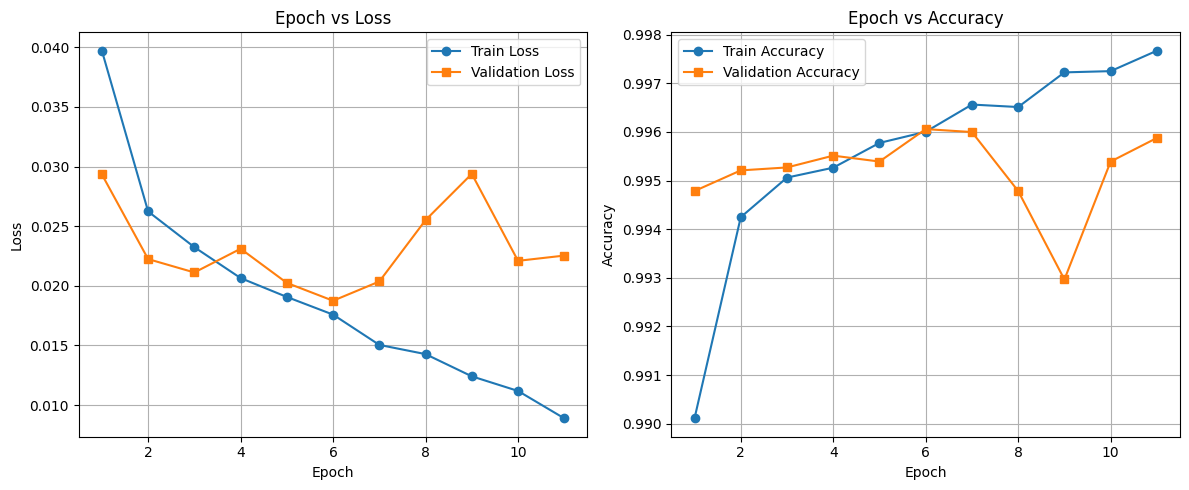

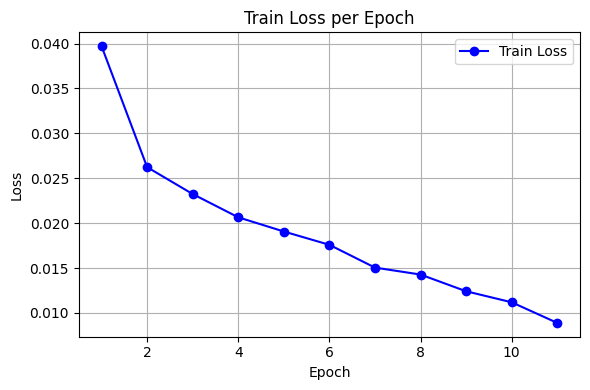

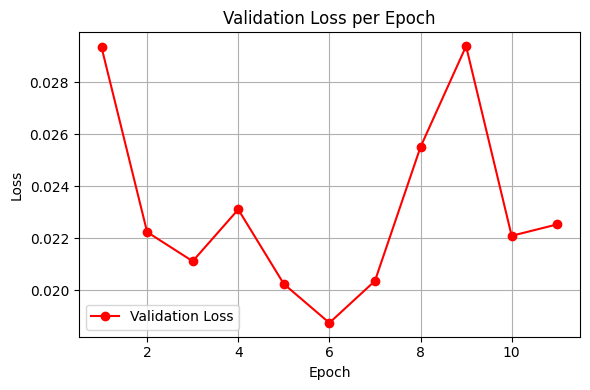

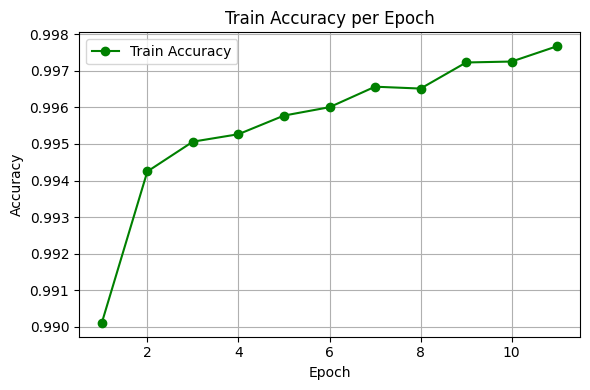

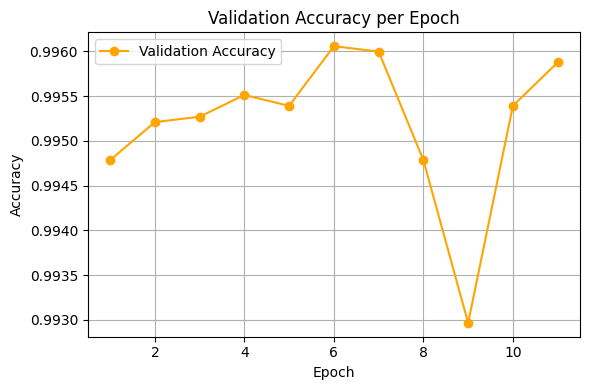

In [13]:
plot_results(train_losses, train_accuracies, val_losses, val_accuracies)

Evaluating: 100%|██████████| 1067/1067 [01:37<00:00, 10.96it/s]


Precision: 0.9953
Recall:    0.9976
F1 Score:  0.9965
AUC:       0.9994


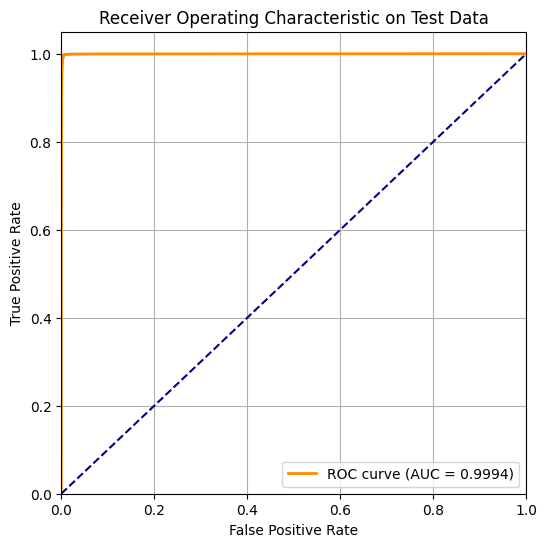

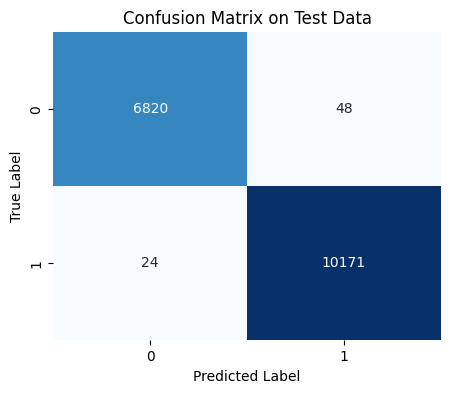

In [14]:
eval_on_metrics(model, test_dataloader)